In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from IPython.core.display import display, HTML
import re
import dateutil.parser
from datetime import datetime as dt

In [2]:
def Action(item):
    if 'Action' in item:
        return 1
    else:
        return 0
    
def Adventure(item):
    if 'Adventure' in item:
        return 1
    else:
        return 0
    
def Animation(item):
    if 'Animation' in item:
        return 1
    else:
        return 0
    
def Biography(item):
    if 'Biography' in item:
        return 1
    else:
        return 0
    
def Comedy(item):
    if 'Comedy' in item:
        return 1
    else:
        return 0
    
def Crime(item):
    if 'Crime' in item:
        return 1
    else:
        return 0
    
def Documentary(item):
    if 'Documentary' in item:
        return 1
    else:
        return 0
    
def Drama(item):
    if 'Drama' in item:
        return 1
    else:
        return 0
    
def Family(item):
    if 'Family' in item:
        return 1
    else:
        return 0
    
def Fantasy(item):
    if 'Fantasy' in item:
        return 1
    else:
        return 0
    
def History(item):
    if 'History' in item:
        return 1
    else:
        return 0    
    
def Horror(item):
    if 'Horror' in item:
        return 1
    else:
        return 0
    
def Music(item):
    if 'Music' in item:
        return 1
    else:
        return 0
    
def Music(item):
    if 'Music' in item:
        return 1
    else:
        return 0
    
def Musical(item):
    if 'Musical' in item:
        return 1
    else:
        return 0
    
def Mystery(item):
    if 'Mystery' in item:
        return 1
    else:
        return 0
    
def Romance(item):
    if 'Romance' in item:
        return 1
    else:
        return 0
    
def SciFi(item):
    if 'Sci-Fi' in item:
        return 1
    else:
        return 0
    
def Sport(item):
    if 'Sport' in item:
        return 1
    else:
        return 0
    
def Thriller(item):
    if 'Thriller' in item:
        return 1
    else:
        return 0

def War(item):
    if 'War' in item:
        return 1
    else:
        return 0
    
def Western(item):
    if 'Western' in item:
        return 1
    else:
        return 0


In [3]:
df = pd.read_pickle('MovieData20.pkl')

In [4]:
df.head()

,Movie_Title,Distributor,Domestic_Total_Gross,Budget,Runtime(mins),Rating,Release_Date,Genre
0,Star Wars: The Rise Of Skywalker,Walt Disney Studios Motion Pictures,483645801,None,142,PG-13,2019-12-20,"Action, Adventure, Fantasy, Sci-Fi"
1,Star Wars: The Rise Of Skywalker,Walt Disney Studios Motion Pictures,483645801,None,142,PG-13,2019-12-20,"Action, Adventure, Fantasy, Sci-Fi"
2,Jumanji: The Next Level,Sony Pictures Releasing,260912975,125000000,123,PG-13,2019-12-13,"Action, Adventure, Comedy, Fantasy"
3,Frozen II,Walt Disney Studios Motion Pictures,461151690,None,103,PG,2019-11-22,"Adventure, Animation, Comedy, Family, Fantasy,..."
4,Frozen II,Walt Disney Studios Motion Pictures,461151690,None,103,PG,2019-11-22,"Adventure, Animation, Comedy, Family, Fantasy,..."


In [5]:
df['strpdate'] = pd.to_datetime(df.Release_Date, format = "%Y-%M-%D")
df['year'] = pd.DatetimeIndex(df['strpdate']).year


In [6]:
Glist = list(df['Genre'].str.split(' ', expand=True).stack().unique())
Glist2 = []
for item in Glist:
    Glist2.append(item.strip(','))
Glistset = list(set(Glist2))
Glistset.sort()
len(Glistset)

21

In [7]:
funclist = [Action, Adventure, Animation, Biography, Comedy, 
            Crime, Documentary, Drama, Family, Fantasy, 
            History, Horror, Music, Musical, Mystery, Romance, 
            SciFi, Sport, Thriller, War, Western]

In [8]:
for i in range(len(Glistset)):
        df[Glistset[i]] = df['Genre'].apply(funclist[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 31 columns):
Movie_Title             1018 non-null object
Distributor             1018 non-null object
Domestic_Total_Gross    1018 non-null object
Budget                  905 non-null object
Runtime(mins)           1003 non-null object
Rating                  995 non-null object
Release_Date            1018 non-null datetime64[ns]
Genre                   1018 non-null object
strpdate                1018 non-null datetime64[ns]
year                    1018 non-null int64
Action                  1018 non-null int64
Adventure               1018 non-null int64
Animation               1018 non-null int64
Biography               1018 non-null int64
Comedy                  1018 non-null int64
Crime                   1018 non-null int64
Documentary             1018 non-null int64
Drama                   1018 non-null int64
Family                  1018 non-null int64
Fantasy                 1018 non-n

In [9]:
dft = df.copy()

In [15]:
dft

,Movie_Title,Distributor,Domestic_Total_Gross,Budget,Runtime(mins),Rating,Release_Date,Genre,strpdate,year,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Star Wars: The Rise Of Skywalker,Walt Disney Studios Motion Pictures,483645801,None,142,PG-13,2019-12-20,"Action, Adventure, Fantasy, Sci-Fi",2019-12-20,2019,...,0,0,0,0,0,1,0,0,0,0
1,Star Wars: The Rise Of Skywalker,Walt Disney Studios Motion Pictures,483645801,None,142,PG-13,2019-12-20,"Action, Adventure, Fantasy, Sci-Fi",2019-12-20,2019,...,0,0,0,0,0,1,0,0,0,0
2,Jumanji: The Next Level,Sony Pictures Releasing,260912975,125000000,123,PG-13,2019-12-13,"Action, Adventure, Comedy, Fantasy",2019-12-13,2019,...,0,0,0,0,0,0,0,0,0,0
3,Frozen II,Walt Disney Studios Motion Pictures,461151690,None,103,PG,2019-11-22,"Adventure, Animation, Comedy, Family, Fantasy,...",2019-11-22,2019,...,0,1,1,0,0,0,0,0,0,0
4,Frozen II,Walt Disney Studios Motion Pictures,461151690,None,103,PG,2019-11-22,"Adventure, Animation, Comedy, Family, Fantasy,...",2019-11-22,2019,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Scream 3,Dimension Films,89143175,40000000,116,R,2000-02-04,"Horror, Mystery",2000-02-04,2000,...,1,0,0,1,0,0,0,0,0,0
1014,Eye of the Beholder,Destination Films,16500786,35000000,109,R,2000-01-28,"Drama, Mystery, Thriller",2000-01-28,2000,...,0,0,0,1,0,0,0,1,0,0
1015,Next Friday,New Line Cinema,57328603,11000000,98,R,2000-01-12,Comedy,2000-01-12,2000,...,0,0,0,0,0,0,0,0,0,0
1016,Next Friday,New Line Cinema,57328603,11000000,98,R,2000-01-12,Comedy,2000-01-12,2000,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dist = pd.get_dummies(dft['Distributor'], drop_first=True)

In [11]:
dfall = pd.concat([dft,dist],sort=False,join='outer',axis = 1)

In [12]:
dfall['Domestic_Total_Gross'] = dfall['Domestic_Total_Gross'].apply(float)

In [21]:
dfall['Runtime(mins)'].fillna(value=pd.np.nan, inplace=True)
dfall['Runtime(mins)'] = dfall['Runtime(mins)'].apply(float)

In [24]:
dfall.head()

,Movie_Title,Distributor,Domestic_Total_Gross,Budget,Runtime(mins),Rating,Release_Date,Genre,strpdate,year,...,Screen Gems,Sony Pictures Releasing,Summit Entertainment,The Weinstein Company,TriStar Pictures,Twentieth Century Fox,United Artists,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
0,Star Wars: The Rise Of Skywalker,Walt Disney Studios Motion Pictures,483645801.0,NaN,142.0,PG-13,2019-12-20,"Action, Adventure, Fantasy, Sci-Fi",2019-12-20,2019,...,0,0,0,0,0,0,0,0,1,0
1,Star Wars: The Rise Of Skywalker,Walt Disney Studios Motion Pictures,483645801.0,NaN,142.0,PG-13,2019-12-20,"Action, Adventure, Fantasy, Sci-Fi",2019-12-20,2019,...,0,0,0,0,0,0,0,0,1,0
2,Jumanji: The Next Level,Sony Pictures Releasing,260912975.0,125000000.0,123.0,PG-13,2019-12-13,"Action, Adventure, Comedy, Fantasy",2019-12-13,2019,...,0,1,0,0,0,0,0,0,0,0
3,Frozen II,Walt Disney Studios Motion Pictures,461151690.0,NaN,103.0,PG,2019-11-22,"Adventure, Animation, Comedy, Family, Fantasy,...",2019-11-22,2019,...,0,0,0,0,0,0,0,0,1,0
4,Frozen II,Walt Disney Studios Motion Pictures,461151690.0,NaN,103.0,PG,2019-11-22,"Adventure, Animation, Comedy, Family, Fantasy,...",2019-11-22,2019,...,0,0,0,0,0,0,0,0,1,0


In [18]:
dfall['Budget'].fillna(value=pd.np.nan, inplace=True)
dfall['Budget'] = dfall['Budget'].apply(float)

In [25]:
dfall['CPMin'] = dfall['Budget']/dfall['Runtime(mins)']

In [27]:
#dfall['GvBRatio'] = dfall['Domestic_Total_Gross']/dfall['Budget']

In [56]:
#dfall['Profits'] = dfall['Domestic_Total_Gross'] - dfall['Budget']

In [64]:
#dfall['Profits'].mean()

89069138.06961326

In [29]:
GrossLP = dfall.groupby(['year']).Domestic_Total_Gross.mean().reset_index()

In [30]:
BudgetLP = dfall.groupby(['year']).Budget.mean().reset_index()

In [31]:
GrossLP

,year,Domestic_Total_Gross
0,1999,1.400354e+08
1,2000,1.264474e+08
2,2001,1.435743e+08
3,2002,1.637918e+08
4,2003,1.463967e+08
5,2004,1.804431e+08
6,2005,1.492805e+08
7,2006,1.380614e+08
8,2007,1.456678e+08
9,2008,1.521695e+08


([<matplotlib.axis.XTick at 0x186ba7bfdc8>,
 <a list of 11 Text xticklabel objects>)

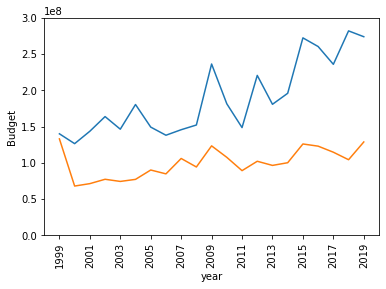

In [32]:
sns.lineplot(GrossLP['year'],GrossLP['Domestic_Total_Gross'])
sns.lineplot(GrossLP['year'],BudgetLP['Budget'])
plt.ylim(0, 3e8)
plt.xticks(range(1999,2020,2),rotation=90)

In [62]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 60 columns):
Movie_Title                            1018 non-null object
Distributor                            1018 non-null object
Domestic_Total_Gross                   1018 non-null float64
Budget                                 905 non-null float64
Runtime(mins)                          1003 non-null float64
Rating                                 995 non-null object
Release_Date                           1018 non-null datetime64[ns]
Genre                                  1018 non-null object
strpdate                               1018 non-null datetime64[ns]
year                                   1018 non-null int64
Action                                 1018 non-null int64
Adventure                              1018 non-null int64
Animation                              1018 non-null int64
Biography                              1018 non-null int64
Comedy                                 10

In [61]:
dfall.loc[dfall['CPMin'].idxmax()]

Movie_Title                                                                      Tangled
Distributor                                          Walt Disney Studios Motion Pictures
Domestic_Total_Gross                                                         2.00822e+08
Budget                                                                           2.6e+08
Runtime(mins)                                                                        100
Rating                                                                                PG
Release_Date                                                         2010-11-24 00:00:00
Genre                                  Adventure, Animation, Comedy, Family, Fantasy,...
strpdate                                                             2010-11-24 00:00:00
year                                                                                2010
Action                                                                                 0
Adventure            

In [55]:
dfall.head(460)

,Movie_Title,Distributor,Domestic_Total_Gross,Budget,Runtime(mins),Rating,Release_Date,Genre,strpdate,year,...,Summit Entertainment,The Weinstein Company,TriStar Pictures,Twentieth Century Fox,United Artists,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,CPMin,GvBRatio
0,Star Wars: The Rise Of Skywalker,Walt Disney Studios Motion Pictures,483645801.0,NaN,142.0,PG-13,2019-12-20,"Action, Adventure, Fantasy, Sci-Fi",2019-12-20,2019,...,0,0,0,0,0,0,1,0,NaN,NaN
1,Star Wars: The Rise Of Skywalker,Walt Disney Studios Motion Pictures,483645801.0,NaN,142.0,PG-13,2019-12-20,"Action, Adventure, Fantasy, Sci-Fi",2019-12-20,2019,...,0,0,0,0,0,0,1,0,NaN,NaN
2,Jumanji: The Next Level,Sony Pictures Releasing,260912975.0,125000000.0,123.0,PG-13,2019-12-13,"Action, Adventure, Comedy, Fantasy",2019-12-13,2019,...,0,0,0,0,0,0,0,0,1.016260e+06,2.087304
3,Frozen II,Walt Disney Studios Motion Pictures,461151690.0,NaN,103.0,PG,2019-11-22,"Adventure, Animation, Comedy, Family, Fantasy,...",2019-11-22,2019,...,0,0,0,0,0,0,1,0,NaN,NaN
4,Frozen II,Walt Disney Studios Motion Pictures,461151690.0,NaN,103.0,PG,2019-11-22,"Adventure, Animation, Comedy, Family, Fantasy,...",2019-11-22,2019,...,0,0,0,0,0,0,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Little Fockers,Universal Pictures,148438600.0,100000000.0,98.0,PG-13,2010-12-22,"Comedy, Romance",2010-12-22,2010,...,0,0,0,0,0,1,0,0,1.020408e+06,1.484386
456,Little Fockers,Universal Pictures,148438600.0,100000000.0,98.0,PG-13,2010-12-22,"Comedy, Romance",2010-12-22,2010,...,0,0,0,0,0,1,0,0,1.020408e+06,1.484386
457,TRON: Legacy,Walt Disney Studios Motion Pictures,172062763.0,170000000.0,125.0,PG,2010-12-17,"Action, Adventure, Sci-Fi",2010-12-17,2010,...,0,0,0,0,0,0,1,0,1.360000e+06,1.012134
458,The Chronicles of Narnia: The Voyage of the Da...,Twentieth Century Fox,104386950.0,155000000.0,113.0,PG,2010-12-10,"Adventure, Family, Fantasy",2010-12-10,2010,...,0,0,0,1,0,0,0,0,1.371681e+06,0.673464


In [67]:
dfsingle = dfall.drop_duplicates().reset_index()

In [70]:
dfsingle.mean()


index                                  5.186284e+02
Domestic_Total_Gross                   1.552468e+08
Budget                                 8.963629e+07
Runtime(mins)                          1.135938e+02
year                                   2.009271e+03
Action                                 4.629898e-01
Adventure                              4.441219e-01
Animation                              1.248186e-01
Biography                              2.612482e-02
Comedy                                 3.497823e-01
Crime                                  1.277213e-01
Documentary                            7.256894e-03
Drama                                  2.786647e-01
Family                                 2.060958e-01
Fantasy                                2.380261e-01
History                                1.596517e-02
Horror                                 1.320755e-01
Music                                  3.918723e-02
Musical                                2.177068e-02
Mystery     